# 20200419

In [71]:
# !pip install plotly

In [127]:
import numpy as np
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tls 

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 

df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')
df_train['FamilySize'] = df_train['SibSp'] = df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] = df_test['Parch'] + 1

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0 )
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0 )

# Feature Engineering 

## 3.1 Fill Null 

### 3.1.1 Fill Null in Age using title 

In [128]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [129]:
# df_train['Initial'].unique()

In [130]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,1,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,1,0,373450,2.085672,NaN,S,1,Mr


In [131]:
df_train.shape

(891, 14)

In [132]:
sex = pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')
sex.columns

Index(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
      dtype='object', name='Initial')

In [133]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Mr','Dr','Lady', 'Major','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'], inplace=True)
# ?'Dona' 와 'Jonkheer'은 컬럼에 없는데 어떻게 리플레이스? 
df_test['Initial'].replace(['Mlle', 'Mme', 'Mr','Dr','Lady', 'Major','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'], inplace=True)

In [134]:
df_train.groupby('Initial').mean()
# 'Survived' 를 보자 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.375000,1.375000,3.340710,2.375000
Miss,443.185185,0.300570,2.377493,29.494516,1.254986,0.254986,2.760729,1.254986
Mr,523.181818,0.454545,1.181818,45.900000,1.090909,0.090909,3.640263,1.090909
Mrs,456.187500,0.789062,1.976562,36.099099,1.812500,0.812500,3.440424,1.812500
Ms,444.000000,1.000000,2.000000,28.000000,1.000000,0.000000,2.564949,1.000000
Other,564.444444,0.111111,1.666667,45.888889,1.111111,0.111111,2.641605,1.111111


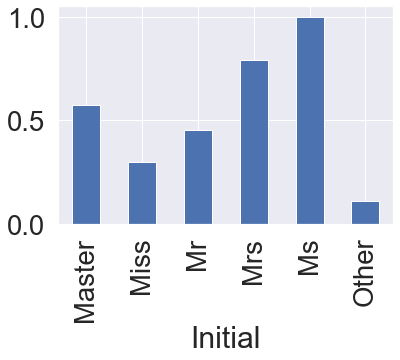

In [135]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [136]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.375000,1.375000,3.340710,2.375000
Miss,443.185185,0.300570,2.377493,29.494516,1.254986,0.254986,2.760729,1.254986
Mr,523.181818,0.454545,1.181818,45.900000,1.090909,0.090909,3.640263,1.090909
Mrs,456.187500,0.789062,1.976562,36.099099,1.812500,0.812500,3.440424,1.812500
Ms,444.000000,1.000000,2.000000,28.000000,1.000000,0.000000,2.564949,1.000000
Other,564.444444,0.111111,1.666667,45.888889,1.111111,0.111111,2.641605,1.111111


In [137]:
# loc + boolean + column 

In [138]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 29
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 29
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='other'),'Age'] = 46

In [139]:
# 다양한 방법으로 결측치 채우기 공부 :
# https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

### 3.1.2 Fill Null in Embarked 

In [140]:
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has 2 Null values


In [141]:
# (df_train[df_train['Embarked'] == 'S'] == True)
# ? 이렇게 밖에 할 수 없나 

In [142]:
df_train['Embarked'].fillna('S', inplace=True)

## 3.2 Change Age(continuous to categorical) 

In [143]:
# 범주화 ! 

In [144]:
df_train['Age_cat'] = 0 
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0 
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
# & 로 묶는구나 ! 
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0 
df_test.loc[df_train['Age'] < 10, 'Age_cat'] = 0 
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [145]:
def category_age(x) : 
    if x < 10 : 
        return 0 
    elif x < 20 : 
        return 1 
    elif x < 30 :
        return 2 
    elif x < 40 : 
        return 3 
    elif x < 50 : 
        return 4 
    elif x < 60 : 
        return 5 
    elif x < 70 :
        return 6
    else :
        return 7 
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)
# x 가 값 

In [146]:
print('1번 방법, 2번 방법 둘 다 같은 결과를 내면 True :', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘 다 같은 결과를 내면 True : True


In [147]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [148]:
len(df_train.columns)

14

In [149]:
len(df_test.columns)

13

## 3.3 Change Initial, Embarked and Sex (string to numerical) 

In [150]:
# 특정 컬럼의 값 확인 ! : unique(), value_counts()

In [151]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [152]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [153]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [154]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [155]:
df_train['Embarked'].isnull().any()

False

In [156]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,1,1.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,1,3.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,STON/O2. 3101282,2.070022,NaN,2,1,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,1,3.0,3
4,5,0,3,"Allen, Mr. William Henry",male,1,0,373450,2.085672,NaN,2,1,1.0,3


In [157]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

In [158]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Initial',
       'Age_cat'],
      dtype='object')

In [159]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,1,1.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,1,3.0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,STON/O2. 3101282,2.070022,NaN,2,1,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,1,3.0,3
4,5,0,3,"Allen, Mr. William Henry",1,1,0,373450,2.085672,NaN,2,1,1.0,3


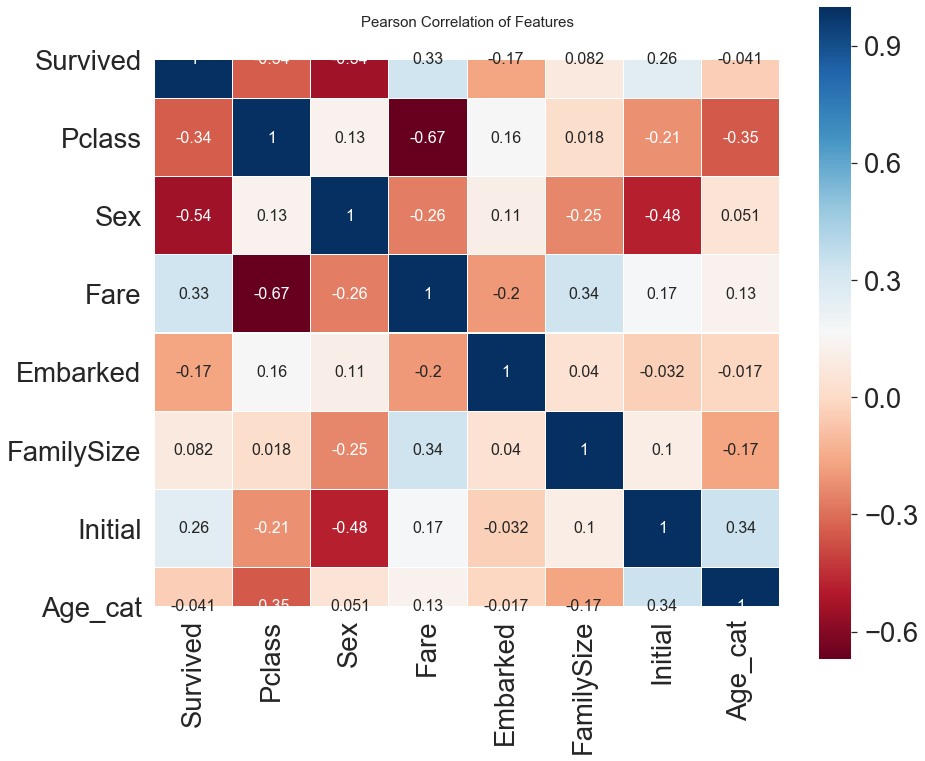

In [160]:
# 수치화 된 것만 
# ? Fare 은 구격화가 된 것인가? 
# ? Initial 은 str 인데? => 일단 빼 보았다 
heatmap_data = df_train[[ 'Survived', 'Pclass', 'Sex', 'Fare' , 'Embarked', 'FamilySize', 'Initial', 'Age_cat' ]]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

## 3.4 One_hot encoding on Initial and Embarked 

In [161]:
# get_dummies 

In [162]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [163]:
df_train.head()
# prefix = 같은이름 붙여주기 (분류하기쉽게)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,1,2,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,1,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,1,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,1,0,373450,2.085672,NaN,2,1,3,0,1,0,0,0


In [164]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix='Embarked')

In [165]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,1,2,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,1,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,1,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,1,0,373450,2.085672,NaN,1,3,0,1,0,0,0,0,0,1


In [167]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilySize', 'Age_cat', 'Initial_0.0',
       'Initial_1.0', 'Initial_2.0', 'Initial_3.0', 'Initial_4.0',
       'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [166]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'FamilySize', 'Age_cat', 'Initial_0.0', 'Initial_1.0',
       'Initial_2.0', 'Initial_3.0', 'Initial_4.0', 'Embarked_0', 'Embarked_1',
       'Embarked_2'],
      dtype='object')

## 3.5 Drop columns 

In [168]:
df_train.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [169]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,1,2,0,1,0,0,0,0,0,1
1,1,1,0,4.266662,1,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,1,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,1,0,0,0,0,0,1


In [170]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,1,0,0,0,0,1,0
1,3,0,1.945910,1,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,1,0,0,0,0,1,0
3,3,1,2.159003,1,2,0,1,0,0,0,0,0,1
4,3,0,2.508582,2,2,0,0,0,1,0,0,0,1


# 20200421

# 4. Building machine learning model and prediction using the trained model

In [171]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics # 모델 평가를 위해 사용 
from sklearn.model_selection import train_test_split 
# ! sklearn 공부 
# 파이썬 라이브러리를 활용한 머신러닝(Introduction to machine larning with Python)
# 책을 사서 공부하시길 매우 추천해드립니다. 

## 4.1 Preparation - Split dataset into train, valid, test set

In [172]:
X_train = df_train.drop('Survived', axis=1).values 
target_label = df_train['Survived'].values 
X_test = df_test.values

In [173]:
len(X_train), len(X_test)

(891, 418)

In [174]:
df_train.columns[1:]

Index(['Pclass', 'Sex', 'Fare', 'FamilySize', 'Age_cat', 'Initial_0.0',
       'Initial_1.0', 'Initial_2.0', 'Initial_3.0', 'Initial_4.0',
       'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [175]:
df_test.columns

Index(['Pclass', 'Sex', 'Fare', 'FamilySize', 'Age_cat', 'Initial_0.0',
       'Initial_1.0', 'Initial_2.0', 'Initial_3.0', 'Initial_4.0',
       'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [176]:
# if df_train.columns[1:] != df_test.columns:
#     print(df_train.columns[1:])

In [50]:
len(df_train.columns), len(df_test.columns)

(15, 15)

In [177]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)
# sklearn 지원 머신러닝 알고리즘 : http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

## 4.2 Model generation and prediction

In [178]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [179]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 79.85% 정확도로 생존을 맞춤


In [180]:
# print(df_test['Embarked_0'].sum())

In [181]:
# df_test['Embarked_1'].sum()

In [182]:
# df_test['Embarked_2'].sum()

## 4.3 Feature importance 

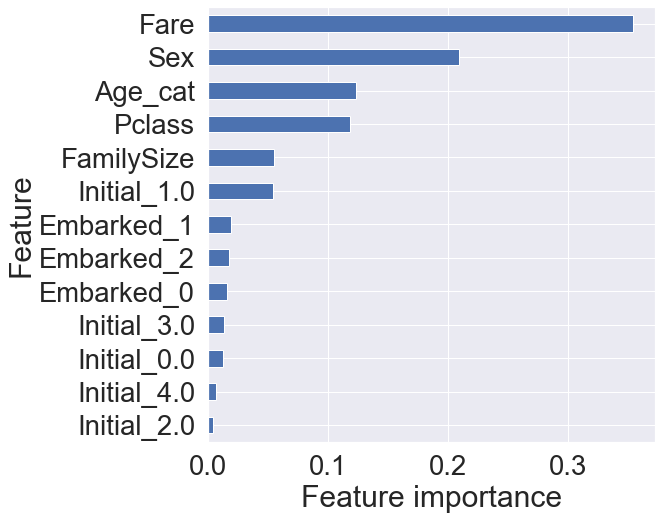

In [183]:
from pandas import Series 

feature_importance = model.feature_importances_ 
# : model.feature_importances_ : 변수 중요도 반환 
Series_feat_imp = Series(feature_importance, index=df_test.columns)

plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [59]:
# model.n_features_

In [60]:
# model.n_outputs_

In [61]:
# model.oob_prediction_

In [63]:
len(df_test.columns)

15

In [64]:
len(feature_importance)

14

## 4.4 Prediction on Test set 

In [186]:
submission = pd.read_csv('./Data/gender_submission.csv')

In [187]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [189]:
prediction = model.predict(X_test)
submission['Survived'] = prediction 